In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
%matplotlib inline

In [2]:
#LECTURE FICHIER SEARCHES
searches = pd.read_csv('/Users/gabrielduval/Desktop/Amadeus/searches.csv', sep="^", dtype='unicode')
#NOMBRE DE LIGNES DU FICHIER SEARCHES
print("Le fichier contient " + str(searches.shape[0]) + " lignes") 

Le fichier contient 20390198 lignes


In [3]:
#LECTURE FICHIER BOOKINGS
bookings = pd.read_csv('/Users/gabrielduval/Desktop/Amadeus/bookings.csv', sep="^", dtype='unicode')
bookings = bookings.dropna(how='any')

#NOMBRE DE LIGNES FICHIER BOOKINGS
print("Le fichier contient " + str(bookings.shape[0]) + " lignes") 

Le fichier contient 10000008 lignes


In [4]:
####  EXERCICE 2
count = bookings['arr_port'].value_counts()
print(count)

LHR         215551
JFK         158930
CDG         149390
LAX         143220
DXB         135640
BKK         130420
MIA         117820
SFO         110970
MNL         109530
ORD          99750
IST          96820
DEL          95570
LAS          93360
HKG          93240
FCO          90880
MAD          89770
MCO          89710
PVG          85960
SYD          79600
SIN          78011
JED          77630
BOM          77150
FRA          76560
BCN          74700
PEK          71120
BOS          69870
DFW          68330
ATL          67310
AMS          66250
MUC          64680
             ...  
SMK             10
PZH             10
YMT             10
HUE             10
TUB             10
GRV             10
BUL             10
DWD             10
SFJ             10
BQB             10
TIU             10
DZN             10
PNK             10
WUS             10
YHO             10
XFN             10
GJL             10
KWN             10
ERS             10
JQA             10
CHU             10
JSY         

In [5]:
bookings['pax'] = bookings['pax'].astype(int)
nb_arrival = bookings.groupby(['arr_port'])['pax'].sum()
nb_arrival

arr_port
AAB            30
AAE           810
AAL           810
AAN            20
AAQ          1650
AAR           500
ABA            90
ABB            40
ABE           880
ABI           150
ABJ          2600
ABK             0
ABQ          4290
ABR             0
ABS           310
ABT           300
ABV          1950
ABX           300
ABY            90
ABZ          3710
ACA           700
ACC          3810
ACE          1700
ACH            20
ACI            40
ACK           200
ACT           180
ACV           140
ACY           190
ADA           980
            ...  
ZAZ            50
ZBF           110
ZBL            90
ZCL           150
ZCO           490
ZDH            60
ZFQ            40
ZFV           120
ZHA             0
ZIG            40
ZIH           870
ZLN             0
ZLO           500
ZNE          1510
ZNZ           970
ZOS            70
ZQN          1720
ZRH         20190
ZSA            10
ZSE            10
ZTH            50
ZUH            40
ZVE            40
ZVJ            20
Z

In [6]:
nb_arrival=nb_arrival.reset_index().sort_values(['pax'],ascending=False).head(10)
nb_arrival['arr_port'] = nb_arrival['arr_port'].str.slice(0,3)
nb_arrival.head()

,arr_port,pax
1088,LHR,88809
1190,MCO,70930
1050,LAX,70530
1047,LAS,69630
886,JFK,66270


In [7]:
#POINT BONUS

url="https://raw.githubusercontent.com/opentraveldata/geobases/public/GeoBases/DataSources/Airports/GeoNames/airports_geonames_only_clean.csv"
geobases=pd.read_csv(url, sep="^")
geobases.columns = ['arr_port', 'arr_name','iata2', 'code', 'country', 'long','lat']
geobases['arr_port'] = geobases['arr_port'].str.slice(0,3)
geobases = geobases.drop('code',1)
geobases = geobases.drop('iata2',1)
geobases = geobases.drop('long',1)
geobases = geobases.drop('lat',1)
geobases.head()

,arr_port,arr_name,country
0,AZI,Abu Dhabi Bateen Airport,United Arab Emirates
1,AAN,Al Ain International Airport,United Arab Emirates
2,DXB,Dubai International Airport,United Arab Emirates
3,FJR,Fujairah,United Arab Emirates
4,RKT,Ras Al Khaimah International Airport,United Arab Emirates


In [8]:
nb_arrival.merge(geobases, how="left")

,arr_port,pax,arr_name,country
0,LHR,88809,London Heathrow Airport,United Kingdom
1,MCO,70930,Orlando International Airport,United States
2,LAX,70530,Los Angeles International Airport,United States
3,LAS,69630,McCarran International Airport,United States
4,JFK,66270,John F Kennedy International Airport,United States
5,CDG,64490,Paris - Charles-de-Gaulle,France
6,BKK,59460,Suvarnabhumi,Thailand
7,MIA,58150,Miami International Airport,United States
8,SFO,58000,San Francisco International Airport,United States
9,DXB,55590,Dubai International Airport,United Arab Emirates


In [205]:
##### EXERCICE 3

searches = pd.read_csv('/Users/gabrielduval/Desktop/Amadeus/searches.csv', sep="^", dtype='unicode')
searches = searches.dropna(how='any')
searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
571,2013-01-01,23:39:44,FXX,420f3e844817b642c924b71358a04746,GB,FCO,PMO,1,6,FCO,...,FCO,2013-06-24,SQ,Y,1ASI,0,0,0,860f530b5891323b10af779731232ecd,LON
837,2013-01-01,14:40:45,FXX,420f3e844817b642c924b71358a04746,GB,MXP,GYE,1,6,MXP,...,MXP,2013-01-11,KK,L,1ASI,0,0,0,c04870ea7cf837caad2be8fdd1cec84e,LON
964,2013-01-01,13:05:51,FXX,a3ab256abb78596dad0f7a49091a9829,GB,BHX,HFE,1,6,BHX,...,BHX,2013-02-17,MK,C,1ASI,0,0,0,1527c6fe130fdbba79269c80d78e31b2,LON
1065,2013-01-02,16:21:37,FXX,3ac5426dd4f6bb8de28349c7b77e1ee4,IT,ORK,YQR,1,6,ORK,...,ORK,2013-01-22,UV,J,1ASI,0,0,0,f1573941e0c272b59462823fcdf702e3,MIL
1066,2013-01-02,18:11:07,FXX,5658cd6848e769c951fbc3c9adcb400e,US,LAX,CNS,0,9,LAX,...,AKL,2013-03-27,BP,J,1ASI,0,0,0,200ef9f9871800970ba2ec0baf371423,BOS


In [9]:
searches['mois'] = searches['Date'].str.slice(0,7)
searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,mois
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA,2013-01
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV,2013-01
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC,2013-01
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO,2013-01
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL,2013-01


In [26]:
destination_list = ['AGP','MAD','BCN']
df = searches[searches['Destination'].isin(destination_list)]
df

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,mois
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL,2013-01
93,2013-01-01,20:15:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,FRA,AGP,1,2,FRA,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA,2013-01
113,2013-01-01,23:40:53,FXX,0028c46214bc260eb3011510a898cd42,ES,ALC,BCN,0,2,ALC,...,NaN,NaN,NaN,1ASI,0,0,0,f024768c26f020e6243423f932c2a4de,MAD,2013-01
147,2013-01-01,15:35:53,MPT,63d35a15724f95939e6d0dd0ca39be16,DE,HHN,AGP,0,1,HHN,...,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BRE,2013-01
151,2013-01-01,10:46:21,MPT,50c54b52322080d2c257390f714f91bd,ES,FRA,MAD,0,1,FRA,...,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MAD,2013-01
165,2013-01-01,03:40:25,MPT,f4b923424d840c9128df27b5242feffa,US,SFO,BCN,1,2,SFO,...,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC,2013-01
177,2013-01-01,11:26:34,MPT,3ac5426dd4f6bb8de28349c7b77e1ee4,IT,MOW,BCN,1,2,MOW,...,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MIL,2013-01
186,2013-01-01,09:46:07,MPT,61880d6e0141d7ec9659ef77e29aab01,DK,CPH,BCN,1,2,CPH,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CPH,2013-01
188,2013-01-01,02:07:17,CAL,b9c9a14cb66d19de74865613593d2e95,MA,NDR,BCN,1,2,NDR,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CAS,2013-01
208,2013-01-01,15:58:35,FFP,99a5fa66a00828db9727aea7ebc6ae74,DE,CGN,BCN,1,2,CGN,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BER,2013-01


In [27]:
import seaborn as sns

graph = df.groupby(['mois','Destination'])['Destination'].count()

graph

mois     Destination
2013-01  AGP             9633
         BCN            29469
         MAD            24258
2013-02  AGP             8379
         BCN            28329
         MAD            22800
2013-03  AGP            10659
         BCN            30552
         MAD            24681
2013-04  AGP             8265
         BCN            31236
         MAD            25251
2013-05  AGP            10830
         BCN            28728
         MAD            26334
2013-06  AGP             7923
         BCN            26505
         MAD            22800
2013-07  AGP             8892
         BCN            29241
         MAD            22971
2013-08  AGP             7866
         BCN            27075
         MAD            21831
2013-09  AGP             8151
         BCN            23427
         MAD            21147
2013-10  AGP             6499
         BCN            20276
         MAD            22294
2013-11  AGP             6384
         BCN            19824
         MAD       

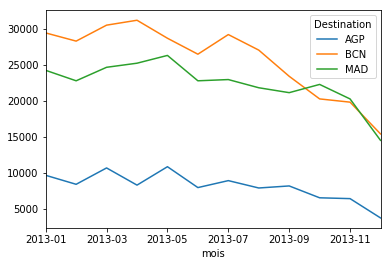

In [28]:
graph.unstack().plot()

In [2]:
###### EXERCICE BONUS

import pandas as pd
import matplotlib.pyplot as plt
import requests
%matplotlib inline


bookings = pd.read_csv('/Users/gabrielduval/Desktop/Amadeus/bookings.csv', sep="^", dtype='unicode')
bookings = bookings.dropna(how='any')

searches = pd.read_csv('/Users/gabrielduval/Desktop/Amadeus/searches.csv', sep="^", dtype='unicode')
searches = searches.dropna(how='any')

In [18]:
df1 = searches[["Date", "Origin", "Destination"]]
df1.head()

,Date,Origin,Destination
571,2013-01-01,FCO,PMO
837,2013-01-01,MXP,GYE
964,2013-01-01,BHX,HFE
1065,2013-01-02,ORK,YQR
1066,2013-01-02,LAX,CNS


In [19]:
bookings.rename(columns={'act_date           ':'Date'}, inplace=True)
bookings['Date'] = bookings['Date'].astype(str)
bookings['Date'] = bookings['Date'].str.slice(0,10)
df2 = bookings[["Date", "dep_port", "arr_port"]]
df2.columns = ['Date', 'Origin','Destination']
df2.head()

,Date,Origin,Destination
0,2013-03-05,ZRH,LHR
1,2013-03-26,SAL,CLT
2,2013-03-26,SAL,CLT
3,2013-03-26,AKL,SVO
4,2013-03-26,AKL,SVO


In [24]:
import numpy as np

df3 = pd.merge(df1, df2, on=['Date','Origin','Destination'], indicator=True, how='outer')

df3

,Date,Origin,Destination,_merge
0,2013-01-01,FCO,PMO,left_only
1,2013-01-01,FCO,PMO,left_only
2,2013-01-01,FCO,PMO,left_only
3,2013-01-01,FCO,PMO,left_only
4,2013-01-01,FCO,PMO,left_only
5,2013-01-01,FCO,PMO,left_only
6,2013-01-01,FCO,PMO,left_only
7,2013-01-01,FCO,PMO,left_only
8,2013-01-01,FCO,PMO,left_only
9,2013-01-01,FCO,PMO,left_only


In [25]:
test = df3[df3['_merge'] == 'Both']
test

,Date,Origin,Destination,_merge
